<a href="https://colab.research.google.com/github/yanapadte/course_data_analysis/blob/main/CS_105_Mini_Project_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 105 Mini Project Report

Yana Padte, Ritvi Ranka, Trusha Bhagwat, Ali Fazl

### Question: Is there a relationship between academic performance and food preparation habits?


#Data Introduction

Our group conducted an analysis to explore the relationship between academic performance and food preparation habits among UCR students. We would like to understand how eating habits such as cooking frequency, eating out frequency, and dietary preferences could potentially correlate with student GPAs and their overall learning effectiveness.

To analyze the relationship we are using data collected on student GPA, number of units taken, major, dietary preference, frequency of cooking and eating out, and reasons for not cooking. To examine studying effectiveness, we will also look at data on how well students learn through class, groups, and self-studying.

We would like to know if students who cook more frequently tend to perform better academically, if learning styles have a relationship with cooking frequency, and if the number of units taken has an effect on eating out frequency. Understanding these connections can determine if students who develop specific eating habits can increase their academic success.


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("DATA - Sheet1.csv")  # Ensure the correct file path

# Replace empty spaces with 'NA' in the entire dataset
df = df.replace(r'^\s*$', 'NA', regex=True)

# Display the first few rows to verify the change
#print(df.head(5))
num_rows = df.shape[0]
print(f"Number of rows in the dataset: {num_rows}")


Number of rows in the dataset: 296


In [ ]:
# Remove all rows that contain 'NA' in any column
df = df[~df.eq('NA').any(axis=1)]


#Data Preprocessing

Before proceeding with the analysis, we addressed potential missing data. First, we replaced empty responses with NA. Upon review, we found that only one row contained missing values, so we removed it from our dataset.
The second critical step in our analysis was modifying the variable types. All the data collected from the survey were initially in Object format (categorical); however, some variables were inherently numerical. Below are the modifications applied:

Units: Converted to float type.

GPA: For each categorical range, we assigned the midpoint as a numerical representation. Additionally, for participants who selected "Prefer not to say," the initial approach was to replace their values with the average GPA of the remaining participants. However, since this response was more common among participants with lower GPAs, and we lacked a closely related variable for regression, we excluded these participants (20 individuals) when working with numerical GPA. Nevertheless, we retained the categorical variable, as it remained useful for categorical analysis.

Eat Out Weekly, Cooking Hours per Week: Similar to GPA, we assigned the midpoint of each range to represent these variables numerically. This transformation allows for mathematical operations where needed (we also have the categorical variable).

In-Class Learning, Learning in Group, Self-Study Learning: The responses to these questions were ordinal but stored as strings, often containing descriptive text. We converted them into discrete numerical values for proper analysis.


In [ ]:
print(df.dtypes)

GPA                       object
Units                     object
Dietary                   object
Eat Out Weekly            object
Cooking Hours per Week    object
Not Cooking Reason(s)     object
In Class Learning         object
Learning In Group         object
Self Study Learning       object
Major                     object
dtype: object


In [ ]:
df['Units'] = pd.to_numeric(df['Units'], errors='coerce').astype(float)
print(df.dtypes)

GPA                        object
Units                     float64
Dietary                    object
Eat Out Weekly             object
Cooking Hours per Week     object
Not Cooking Reason(s)      object
In Class Learning          object
Learning In Group          object
Self Study Learning        object
Major                      object
dtype: object


<ipython-input-85-545ab3e2181c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Units'] = pd.to_numeric(df['Units'], errors='coerce').astype(float)


In [ ]:
import numpy as np

# Define GPA range mapping to mean values
gpa_mapping = {
    "< 1.66": 1.6,
    "1.66 – 2.0": 1.83,  # Added missing range
    "2.0 – 2.33": 2.165,
    "2.33 – 2.67": 2.5,
    "2.67 – 3.0": 2.835,
    "3.0 – 3.33": 3.165,
    "3.33 – 3.67": 3.5,
    "3.67 – 4.0": 3.835,
    "Prefer not to say": np.nan,  # Convert to NaN for missing values
    "NA": np.nan  # Handle any 'NA' values
}

# Create a new column 'GPA_2' with mean values
df['GPA_Num'] = df['GPA'].replace(gpa_mapping).astype(float)

# Display the first few rows to verify changes
print(df[['GPA', 'GPA_Num']].head(22))


                  GPA  GPA_Num
0          3.67 – 4.0    3.835
1          3.0 – 3.33    3.165
2          3.67 – 4.0    3.835
3         3.33 – 3.67    3.500
4          2.67 – 3.0    2.835
5          3.67 – 4.0    3.835
6          3.67 – 4.0    3.835
8         3.33 – 3.67    3.500
9         3.33 – 3.67    3.500
10         3.67 – 4.0    3.835
11         3.67 – 4.0    3.835
12         3.0 – 3.33    3.165
13         3.67 – 4.0    3.835
14         3.67 – 4.0    3.835
15         3.67 – 4.0    3.835
16        3.33 – 3.67    3.500
17         3.67 – 4.0    3.835
18        3.33 – 3.67    3.500
19         3.67 – 4.0    3.835
20         3.67 – 4.0    3.835
21         3.67 – 4.0    3.835
22  Prefer not to say      NaN


<ipython-input-86-63ecc683e35a>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['GPA_Num'] = df['GPA'].replace(gpa_mapping).astype(float)
<ipython-input-86-63ecc683e35a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GPA_Num'] = df['GPA'].replace(gpa_mapping).astype(float)


In [ ]:
print(df['GPA_Num'].unique())  # Replace 'ColumnName' with your variable name


[3.835 3.165 3.5   2.835   nan 2.5   2.165 1.6   1.83 ]


In [ ]:
# Calculate the average of all non-NaN values in 'GPA_2'
#gpa_avg = df['GPA_Num'].mean()

# Replace NaN values in 'GPA_2' with the calculated average
#df['GPA_Num'].fillna(gpa_avg, inplace=True)

# Display the first few rows to verify changes
#print(df[['GPA', 'GPA_Num']].head(27))



prefer_not_say_count = (df['GPA'] == 'Prefer not to say').sum()

# Display the result
print(f"Number of people who chose 'Prefer not to say' for GPA: {prefer_not_say_count}")


Number of people who chose 'Prefer not to say' for GPA: 20


In [ ]:
print(df['Eat Out Weekly'].unique())  # Replace 'ColumnName' with your variable name


['3 - 4 times' '1 - 2 times' '5 - 6 times' '0 times, I don’t eat out'
 '7 - 8 times' '9+ times']


In [ ]:
# Define mapping for 'Eat Out Weekly' to their average values
eat_out_mapping = {
    "0 times, I don’t eat out": 0,
    "1 - 2 times": 1.5,
    "3 - 4 times": 3.5,
    "5 - 6 times": 5.5,
    "7 - 8 times": 7.5,
    "9+ times": 11  # Assumed average for 9+ times
}

# Create a new column 'Eat2' with the mapped values
df['Eat_Out_Num'] = df['Eat Out Weekly'].replace(eat_out_mapping).astype(float)

# Display the first few rows to verify changes
print(df[['Eat Out Weekly', 'Eat_Out_Num']].head())


  Eat Out Weekly  Eat_Out_Num
0    3 - 4 times          3.5
1    1 - 2 times          1.5
2    1 - 2 times          1.5
3    3 - 4 times          3.5
4    3 - 4 times          3.5


<ipython-input-90-b7345c140a60>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Eat_Out_Num'] = df['Eat Out Weekly'].replace(eat_out_mapping).astype(float)
<ipython-input-90-b7345c140a60>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Eat_Out_Num'] = df['Eat Out Weekly'].replace(eat_out_mapping).astype(float)


In [ ]:
print(df['Cooking Hours per Week'].unique())  # Replace 'ColumnName' with your variable name


["0 hours, I don't cook or prep meals" '3 - 4 hours' '1 - 2 hours'
 '5 - 6 hours' '7 - 8 hours' nan '9+ hours']


In [ ]:

# Strip spaces from column names to avoid errors
df.columns = df.columns.str.strip()

# Define mapping for 'Cooking Hours per Week' to their average values
cooking_hours_mapping = {
    "0 hours, I don't cook or prep meals": 0,
    "1 - 2 hours": 1.5,
    "3 - 4 hours": 3.5,
    "5 - 6 hours": 5.5,
    "7 - 8 hours": 7.5,
    "9+ hours": 11,  # Assumed average for 9+ hours
    np.nan: np.nan  # Keep NaN values unchanged
}

# Create a new column 'Eat2' with the mapped values
df['Cooking_Hours_Num'] = df['Cooking Hours per Week'].replace(cooking_hours_mapping).astype(float)

# Display the first few rows to verify changes
print(df[['Cooking Hours per Week', 'Cooking_Hours_Num']].head())


                Cooking Hours per Week  Cooking_Hours_Num
0  0 hours, I don't cook or prep meals                0.0
1                          3 - 4 hours                3.5
2  0 hours, I don't cook or prep meals                0.0
3                          3 - 4 hours                3.5
4  0 hours, I don't cook or prep meals                0.0


<ipython-input-92-82357468c118>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Cooking_Hours_Num'] = df['Cooking Hours per Week'].replace(cooking_hours_mapping).astype(float)
<ipython-input-92-82357468c118>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cooking_Hours_Num'] = df['Cooking Hours per Week'].replace(cooking_hours_mapping).astype(float)


In [ ]:
print(df.dtypes)

GPA                        object
Units                     float64
Dietary                    object
Eat Out Weekly             object
Cooking Hours per Week     object
Not Cooking Reason(s)      object
In Class Learning          object
Learning In Group          object
Self Study Learning        object
Major                      object
GPA_Num                   float64
Eat_Out_Num               float64
Cooking_Hours_Num         float64
dtype: object


In [ ]:
print(df['In Class Learning'].unique())  # Replace 'ColumnName' with your variable name


['3' '5 (very effectively)' '4' '1 (not at all)' '2']


In [ ]:

# Define mapping for 'In Class Learning' to numeric values
in_class_learning_mapping = {
    "1 (not at all)": 1.0,
    "2": 2.0,
    "3": 3.0,
    "4": 4.0,
    "5 (very effectively)": 5.0
}

# Replace values and convert to float
df['In_Class_Num'] = df['In Class Learning'].replace(in_class_learning_mapping).astype(float)

# Display the first few rows to verify changes
print(df[['In Class Learning', 'In_Class_Num']].head())


      In Class Learning  In_Class_Num
0                     3           3.0
1                     3           3.0
2  5 (very effectively)           5.0
3                     4           4.0
4                     3           3.0


<ipython-input-95-8fd55cb60324>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['In_Class_Num'] = df['In Class Learning'].replace(in_class_learning_mapping).astype(float)


In [ ]:
print(df['Learning In Group'].unique())  # Replace 'ColumnName' with your variable name


['3' '4' '1 (not at all)' '5 (very effectively)' '2']


In [ ]:
# Define mapping for 'Learning In Group' to numeric values
learning_group_mapping = {
    "1 (not at all)": 1.0,
    "2": 2.0,
    "3": 3.0,
    "4": 4.0,
    "5 (very effectively)": 5.0
}

# Create a new column 'Learning_Group_Num' with the mapped values
df['Learning_Group_Num'] = df['Learning In Group'].replace(learning_group_mapping).astype(float)

# Display the first few rows to verify changes
print(df[['Learning In Group', 'Learning_Group_Num']].head())


  Learning In Group  Learning_Group_Num
0                 3                 3.0
1                 3                 3.0
2                 4                 4.0
3                 4                 4.0
4    1 (not at all)                 1.0


<ipython-input-97-63c4b27546ee>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Learning_Group_Num'] = df['Learning In Group'].replace(learning_group_mapping).astype(float)


In [ ]:
 print(df['Self Study Learning'].unique())  # Replace 'ColumnName' with your variable name


['5 (very effectively)' '4' '3' '2' '1 (not at all)']


In [ ]:
# Define mapping for 'Learning In Group' to numeric values
Self_Study_mapping = {
    "1 (not at all)": 1.0,
    "2": 2.0,
    "3": 3.0,
    "4": 4.0,
    "5 (very effectively)": 5.0
}

# Create a new column 'Learning_Group_Num' with the mapped values
df['Self_Study_Num'] = df['Self Study Learning'].replace(learning_group_mapping).astype(float)

# Display the first few rows to verify changes
print(df[['Self Study Learning', 'Self_Study_Num']].head())

    Self Study Learning  Self_Study_Num
0  5 (very effectively)             5.0
1                     4             4.0
2                     3             3.0
3                     3             3.0
4                     3             3.0


<ipython-input-99-a137dfe13947>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Self_Study_Num'] = df['Self Study Learning'].replace(learning_group_mapping).astype(float)


In [ ]:
print(df.dtypes)

GPA                        object
Units                     float64
Dietary                    object
Eat Out Weekly             object
Cooking Hours per Week     object
Not Cooking Reason(s)      object
In Class Learning          object
Learning In Group          object
Self Study Learning        object
Major                      object
GPA_Num                   float64
Eat_Out_Num               float64
Cooking_Hours_Num         float64
In_Class_Num              float64
Learning_Group_Num        float64
Self_Study_Num            float64
dtype: object


In [ ]:
print(df['Dietary'].unique())  # Replace 'ColumnName' with your variable name


['Omnivorous' 'Keto' 'Halal' 'Vegetarian' 'idk man I just eat '
 'I don’t know' nan 'idk such fancy words' 'Pescatarian'
 'Every food except beef and pork' 'Vegetarian+Chicken and Fish'
 'Intermittent Fasting' 'Paleo' 'No beef' 'Vegan'
 'Dairy free and gluten free' 'carnivore'
 'How i was raised, I eat anything I might like or see.'
 "I don't have a specific diet"]


In [ ]:
# Count the number of people in each Dietary group
dietary_counts = df['Dietary'].value_counts()

# Convert the counts into a DataFrame for better visualization
dietary_counts_df = pd.DataFrame({'Dietary Group': dietary_counts.index, 'Count': dietary_counts.values})

# Display the result
print(dietary_counts_df)


                                        Dietary Group  Count
0                                          Omnivorous    251
1                                          Vegetarian     11
2                                         Pescatarian      7
3                                                Keto      4
4                                               Paleo      2
5                                               Halal      2
6                                               Vegan      2
7   How i was raised, I eat anything I might like ...      1
8                                           carnivore      1
9                          Dairy free and gluten free      1
10                                            No beef      1
11                        Vegetarian+Chicken and Fish      1
12                               Intermittent Fasting      1
13                    Every food except beef and pork      1
14                               idk such fancy words      1
15                      

*Feature Considerations*

Dietary: We aimed to analyze the relationship between Dietary and other features. However, a significant issue was the highly imbalanced distribution—251 out of 296 participants were Omnivorous, with several other categories represented by only a single participant. Due to this imbalance, the usefulness of this feature for comparative analysis was limited.


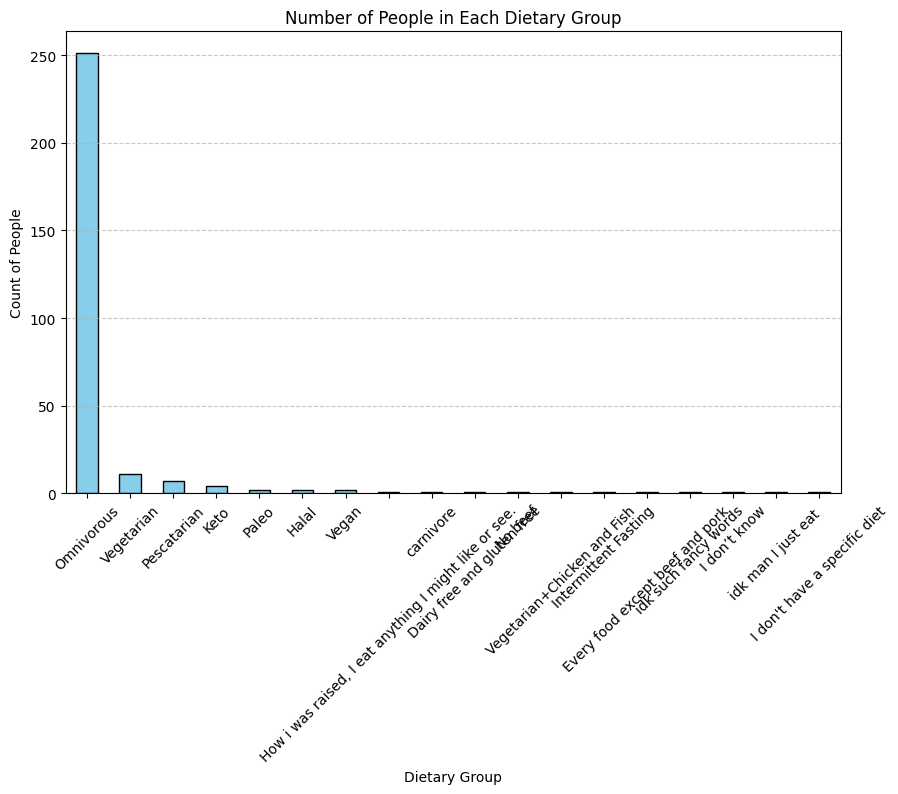

In [ ]:
import matplotlib.pyplot as plt

# Count the number of people in each Dietary group
dietary_counts = df['Dietary'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10,6))
dietary_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel("Dietary Group")
plt.ylabel("Count of People")
plt.title("Number of People in Each Dietary Group")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


*Not Cooking Reason(s):* This variable had a similar issue to Dietary, with many low-frequency categories. However, we noticed that several responses contained variations of "Too much homework" as a reason. To improve usability, we merged all such responses into a single category. Additionally, to ensure meaningful analysis in heatmaps, we ignored categories with fewer than three responses. These modifications reduced the number of unique responses from 89 categories (296 participants) to 6 categories (243 participants), making the data more manageable and interpretable.


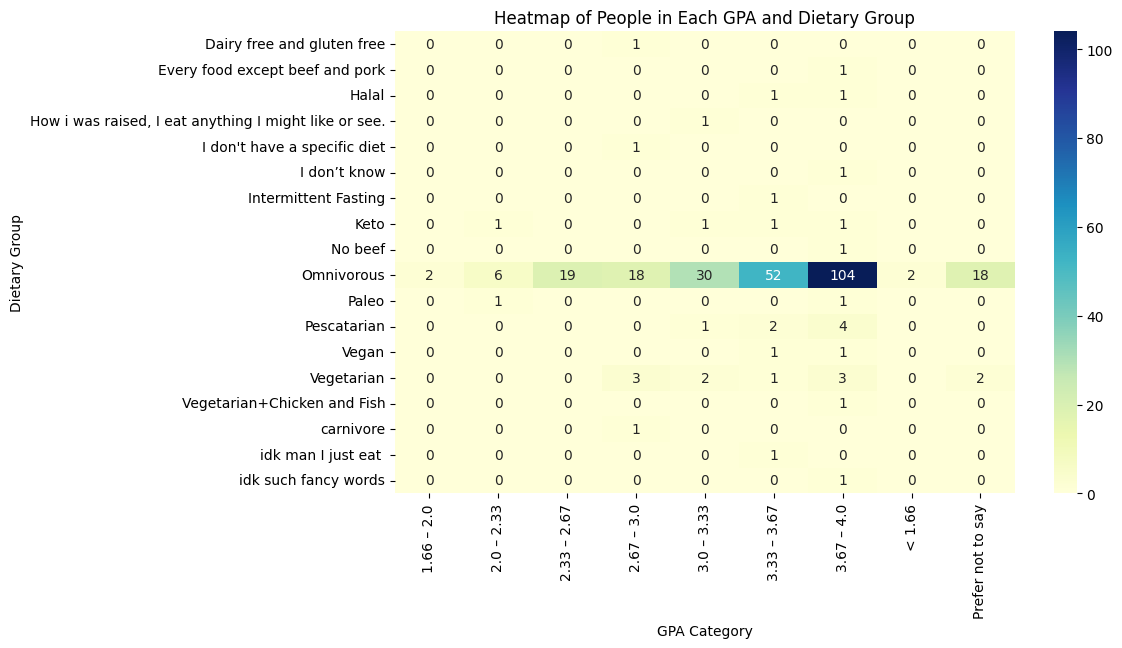

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table to count occurrences of each GPA category within Dietary groups
pivot_table = df.pivot_table(index="Dietary", columns="GPA", aggfunc="size", fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt="d")

# Add labels and title
plt.xlabel("GPA Category")
plt.ylabel("Dietary Group")
plt.title("Heatmap of People in Each GPA and Dietary Group")

# Show the plot
plt.show()


In [ ]:
# Count the frequency of each category in 'Not Cooking Reason(s)' before filtering
category_counts_before_filter = df['Not Cooking Reason(s)'].value_counts()

# Convert to DataFrame for better readability
category_counts_df = pd.DataFrame({'Category': category_counts_before_filter.index, 'Count': category_counts_before_filter.values})

# Display the result
print(category_counts_df)


                                             Category  Count
0                  Too much homework, Not enough time     59
1                                     Not enough time     37
2                                   Rely on meal plan     20
3             Too much homework, Not enough time, Job     13
4                       Rely on meal plan, No kitchen     10
..                                                ...    ...
85  Too much homework, Not enough time, Too expens...      1
86  Not enough time, Rely on meal plan, No kitchen...      1
87                                  Not enough time,       1
88                               I have a dining hall      1
89  Too much homework, Too expensive, Rely on meal...      1

[90 rows x 2 columns]


In [ ]:
# Merge all categories containing 'Too much homework' into a single category
df['Not Cooking Reason(s)'] = df['Not Cooking Reason(s)'].replace(to_replace=r'.*Too much homework.*',
                                                                  value='Too much homework', regex=True)

# Merge all categories containing 'Rely on meal plan' into a single category
df['Not Cooking Reason(s)'] = df['Not Cooking Reason(s)'].replace(to_replace=r'.*Rely on meal plan.*',
                                                                  value='Rely on meal plan',
                                                                  regex=True)
# Count the updated categories
updated_category_counts = df['Not Cooking Reason(s)'].value_counts()

# Convert to DataFrame for better readability
updated_category_counts_df = pd.DataFrame({'Category': updated_category_counts.index, 'Count': updated_category_counts.values})

# Display the updated category counts
print(updated_category_counts_df)


                                             Category  Count
0                                   Too much homework    149
1                                   Rely on meal plan     46
2                                     Not enough time     37
3                              Don’t know how to cook     10
4             Not enough time, Don’t know how to cook      8
5   Not enough time, No mode of transportation to ...      5
6                                              I cook      4
7                         Not enough time, No kitchen      3
8                      Not enough time, Too expensive      2
9   No mode of transportation to the grocery store...      2
10                                               lazy      2
11                 No kitchen, Don’t know how to cook      1
12                                    I cook my meals      1
13  Too expensive, No mode of transportation to th...      1
14                                              None       1
15                      

In [ ]:
# Count the frequency of each category in 'Not Cooking Reason(s)'
updated_category_counts = df['Not Cooking Reason(s)'].value_counts()

# Filter and display only categories with frequency greater than 4
filtered_categories = updated_category_counts[updated_category_counts > 4]

# Convert to DataFrame for better readability
filtered_categories_df = pd.DataFrame({'Category': filtered_categories.index, 'Count': filtered_categories.values})

# Now filter the dataset to only include the categories with frequency > 4
filtered_df = df[df["Not Cooking Reason(s)"].isin(filtered_categories_df["Category"])]

# Display the filtered categories
print(filtered_categories_df)


                                            Category  Count
0                                  Too much homework    149
1                                  Rely on meal plan     46
2                                    Not enough time     37
3                             Don’t know how to cook     10
4            Not enough time, Don’t know how to cook      8
5  Not enough time, No mode of transportation to ...      5


# Visualizations


We use the average GPA_Num in this analysis, and NaN values are ignored in the heatmap to ensure that only valid data points contribute to the visualization. We want to see if there is a GPA pattern amongst students who like to eat out more and if that connects with the reason to not cook.


##Heatmap Analysis: Average GPA (GPA Num) Across Not Cooking Reasons & Eat Out Frequency

We use the average GPA_Num in this analysis, and NaN values are ignored in the heatmap to ensure that only valid data points contribute to the visualization. We want to see if there is a GPA pattern amongst students who like to eat out more and if that connects with the reason to not cook.


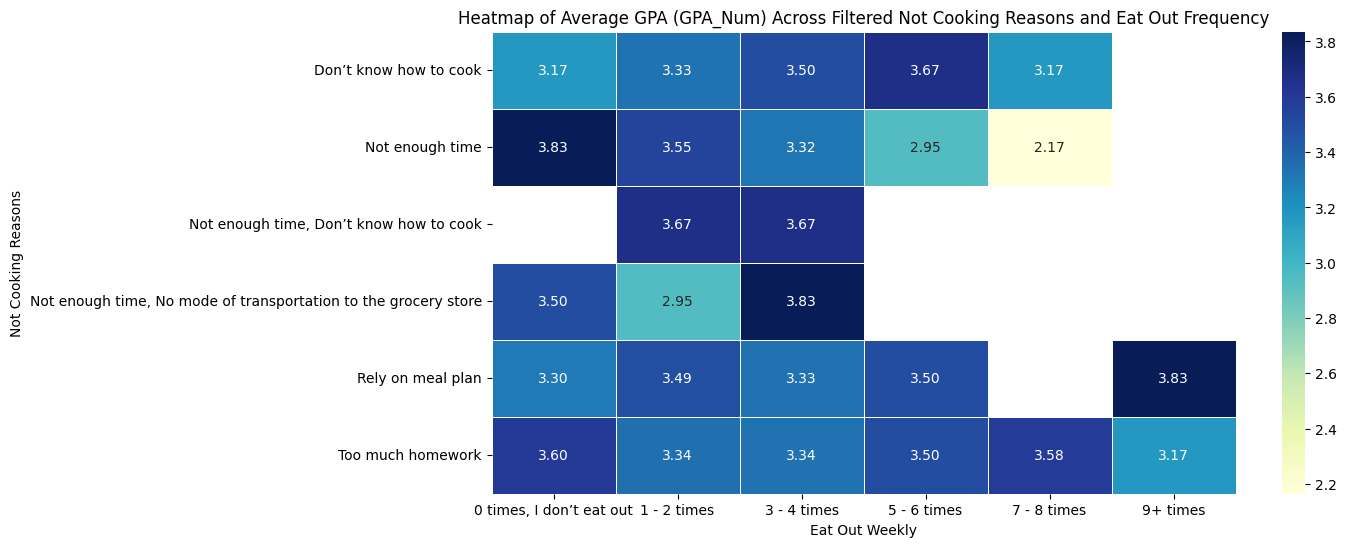

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



# Filter the dataset to only include the categories with frequency > 4
filtered_df = df[df["Not Cooking Reason(s)"].isin(filtered_categories_df["Category"])]

# Create a pivot table for the average GPA_Num
pivot_table_avg_gpa = filtered_df.pivot_table(
    index="Not Cooking Reason(s)",
    columns="Eat Out Weekly",
    values="GPA_Num",
    aggfunc="mean"
)

# Check if pivot table has valid data
if not pivot_table_avg_gpa.empty:
    # Plot the heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot_table_avg_gpa, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)

    # Add labels and title
    plt.xlabel("Eat Out Weekly")
    plt.ylabel("Not Cooking Reasons")
    plt.title("Heatmap of Average GPA (GPA_Num) Across Filtered Not Cooking Reasons and Eat Out Frequency")

    # Show the plot
    plt.show()
else:
    print("No valid data available to plot the heatmap.")



The first noticeable trend is the performance of students who selected "Not Enough Time" as their reason for not cooking. Their academic performance significantly decreases as their Eat Out frequency increases. Since we have more specified categories under "Not Enough Time" (as shown on the Y-axis of the graph), it is likely that this group includes students with various underlying reasons that contribute to their time constraints. Some of these reasons may act as distractions, affecting their ability to focus on academics. For these students, eating out is clearly associated with lower academic performance, which suggests that frequent eating out could be an additional factor reducing their available study time or increasing distractions from academic responsibilities. Although we cannot conclude a direct causal relationship, this graph highlights that students who frequently eat out should be cautious, as this habit might serve as a distraction from their academic responsibilities. On the other hand, students who selected "Rely on a meal plan" maintain strong academic performance even when they eat out frequently. One possible interpretation is that having a structured meal plan helps students focus more on their studies. This assumption is further supported by the fact that the average GPA of different groups who rely on a meal plan is among the highest in the dataset.




To gain deeper insights from our analysis, we examined a heatmap based on the number of participants in each category. This additional visualization reveals that the majority of students who cannot cook cite "Too much homework" as their primary reason, and most of them eat out fewer than five times per week.
However, we must exercise caution when interpreting results from groups with very few participants, as their performance trends may not be statistically significant.

**Not Cooking Reasons vs. Eat Out Frequency Heatmap**


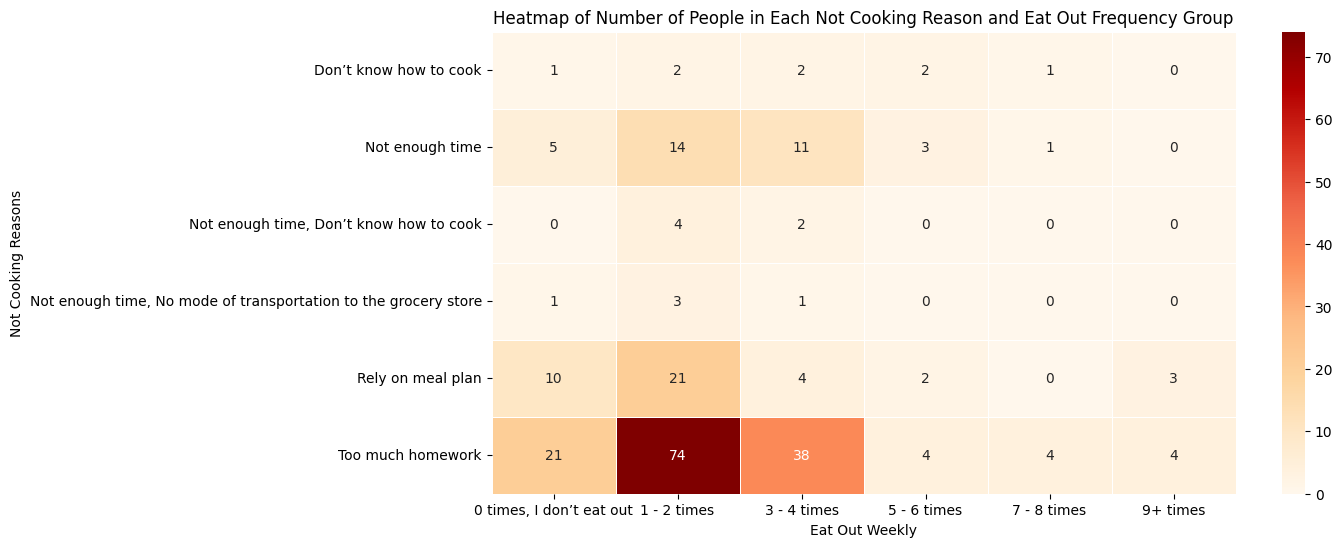

In [ ]:

# Create a pivot table to count the number of people in each group
pivot_table_count = filtered_df.pivot_table(
    index="Not Cooking Reason(s)",
    columns="Eat Out Weekly",
    values="GPA_Num",  # Using GPA_Num just to count occurrences (any non-null column works)
    aggfunc="count",  # Count the number of occurrences
    fill_value=0  # Fill missing values with 0
)

# Plot the heatmap for group count
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table_count, cmap="OrRd", annot=True, fmt="d", linewidths=0.5)

# Add labels and title
plt.xlabel("Eat Out Weekly")
plt.ylabel("Not Cooking Reasons")
plt.title("Heatmap of Number of People in Each Not Cooking Reason and Eat Out Frequency Group")

# Show the plot
plt.show()

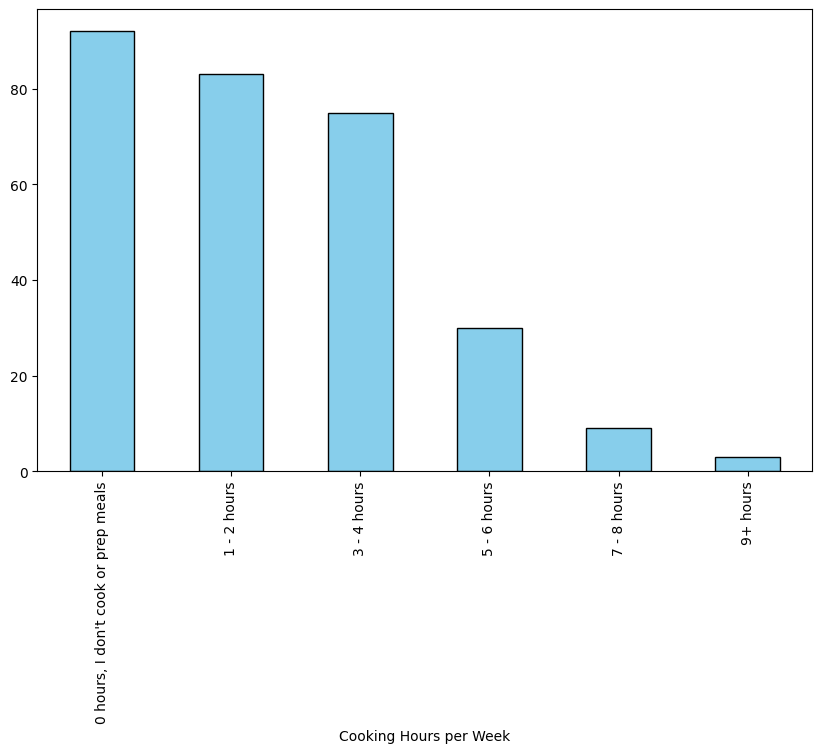

In [ ]:
import matplotlib.pyplot as plt

# Count the number of people in each Dietary group
dietary_counts = df['Cooking Hours per Week'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10,6))
dietary_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
'''
plt.xlabel("Dietary Group")
plt.ylabel("Count of People")
plt.title("Number of People in Each Dietary Group")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
'''

# Show the plot
plt.show()

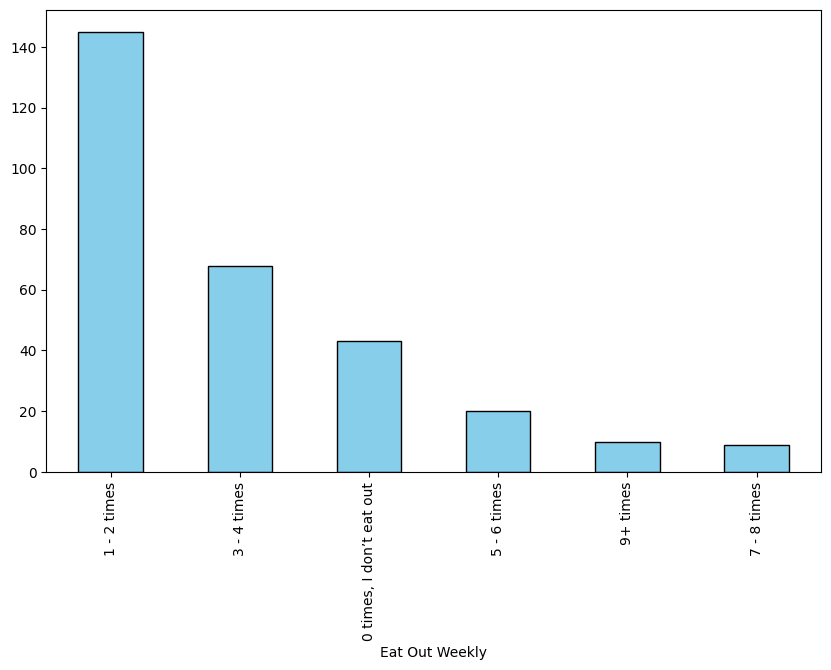

In [ ]:
import matplotlib.pyplot as plt

# Count the number of people in each Dietary group
dietary_counts = df['Eat Out Weekly'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10,6))
dietary_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
'''
plt.xlabel("Dietary Group")
plt.ylabel("Count of People")
plt.title("Number of People in Each Dietary Group")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
'''

# Show the plot
plt.show()

##Scatterplot: Learning Group vs. Cooking Hours (Point Size = Number of People)
Since cooking hours reflect a current activity, it is useful to examine their relationship with learning, which is also a present-focused behavior.


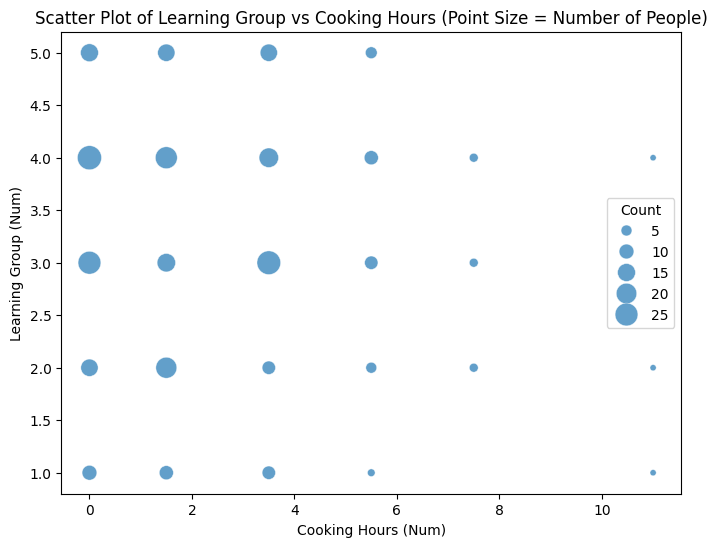

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count occurrences of each (Learning_Group_Num, Cooking_Hours_Num) pair
df_counts = df.groupby(["Learning_Group_Num", "Cooking_Hours_Num"]).size().reset_index(name="Count")

# Scatter plot with point size based on count
plt.figure(figsize=(8,6))
sns.scatterplot(y=df_counts["Learning_Group_Num"],
                x=df_counts["Cooking_Hours_Num"],
                size=df_counts["Count"],
                sizes=(20, 300),  # Adjust point size range
                alpha=0.7,
                legend=True)

# Add labels and title
plt.xlabel("Cooking Hours (Num)")
plt.ylabel("Learning Group (Num)")
plt.title("Scatter Plot of Learning Group vs Cooking Hours (Point Size = Number of People)")

# Show the plot
plt.show()


Observations:
Most students spend very few hours cooking.
Group learning ratings are fairly evenly distributed, but students who cook very little (0–3 hours) appear across all effectiveness levels.
Cooking less does not necessarily mean better or worse learning performance.
The correlation between cooking hours and group learning effectiveness is -0.16, confirming the visual interpretation that there is no strong (linear) relationship between the two variables.
Many students who cook 0–3 hours per week still rate their group learning experience highly, possibly because spending less time cooking allows more time for collaboration and study.


In [ ]:
# Calculate the correlation between Cooking_Hours_Num and Learning_Group_Num
correlation = df["Cooking_Hours_Num"].corr(df["Learning_Group_Num"])
print(correlation)



-0.016471343939049525


**Conclusion**:
Overall, cooking hours do not strongly correlate with group learning effectiveness, though students who rate their group learning experience highly tend to cook less.


##Parallel Coordinates Plot: Learning Style and Dietary Preference
We wanted to examine if there was a relationship between learning styles and dietary preferences. The different learning styles we examined were learning in class, learning in a group with friends, and learning by yourself. The participants rated which style of learning was most effective on a scale of 1-5, 1 being the least effective and 5 being the most effective. I had to clean the data- the participants were given the option to type in their own diet, causing a number of different answers

In [ ]:
dietary_mapping = {
    'Omnivorous': 'Omnivorous',
    'Vegetarian': 'Vegetarian',
    'Vegan': 'Vegan',
    'Halal': 'Halal',
    'Keto': 'Keto',
    'Pescatarian': 'Pescatarian',
    'Vegetarian+Chicken and Fish': 'Pescatarian',
    'Paleo': 'Paleo',
    'Dairy free and gluten free': 'Other',
    'idk man I just eat ': 'Other',
    "I don’t know": 'Other',
    'Every food except beef and pork': 'Other',
    'No beef': 'Other',
    'carnivore': 'Other',
    'idk such fancy words': "Other",
    'Intermittent Fasting': 'Other',
    'How i was raised, I eat anything I might like or see.': 'Other',
    "I don't have a specific diet": 'Other'
}

df['Dietary'] = df['Dietary'].replace(dietary_mapping)

print(df['Dietary'].unique())

['Omnivorous' 'Keto' 'Halal' 'Vegetarian' 'Other' nan 'Pescatarian'
 'Paleo' 'Vegan']


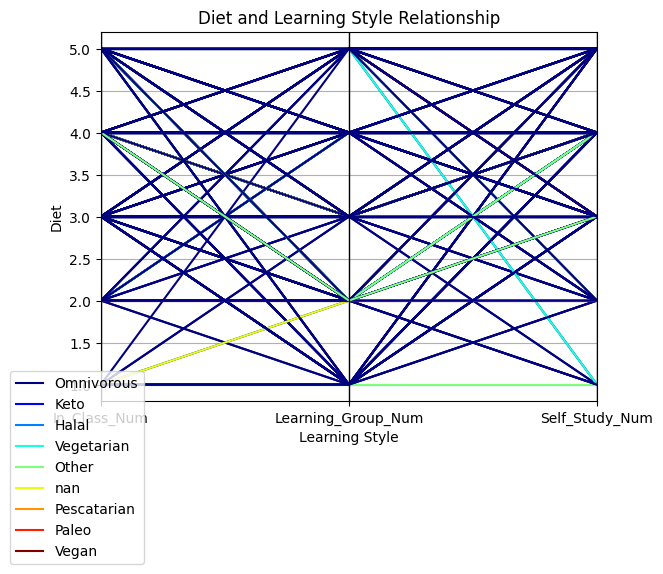

Dietary
Omnivorous     251
Vegetarian      11
Other           10
Pescatarian      8
Keto             4
Halal            2
Paleo            2
Vegan            2
Name: count, dtype: int64


In [ ]:
#parallel line for dietary vs learning style

from pandas.plotting import parallel_coordinates
df_parallel = df[['In_Class_Num', 'Learning_Group_Num', 'Self_Study_Num', 'Dietary']]
parallel_coordinates(df_parallel, 'Dietary', colormap='jet')

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Diet and Learning Style Relationship')
plt.xlabel('Learning Style')
plt.ylabel('Diet')
plt.show()

print(df['Dietary'].value_counts())

The visualization generated does not show anything significant. Looking at just the graph, it was hard to understand what was happening. I then used the function value_counts() to understand what was happening. When looking at the counts for the dietary preferences, we can see that there is an overwhelming majority of people who selected that they were omnivores. Because of this, we cannot definitively determine if there is a relationship between dietary preferences and learning styles. There is not enough data in the other dietary preferences to be able to create an effective parallel line plot.  


##Scatterplot: Students who eat out will tend to take higher units
We are looking at the relationship between the amount that students eat out per week and the number of units students take. I wanted to compare this because I thought that there may be a relation, as students who take more units may have less time to be responsible for their food prep, so they would eat out more.


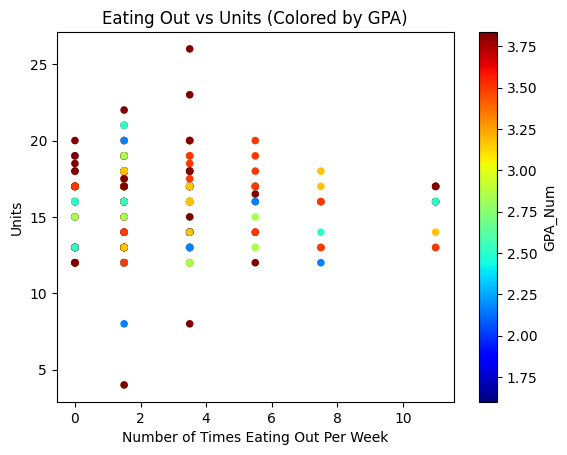

In [ ]:
ax1 = df.plot.scatter(x='Eat_Out_Num', y = 'Units',
                      c = 'GPA_Num', cmap = 'jet',
                      xlabel = 'Number of Times Eating Out Per Week',
                      title = 'Eating Out vs Units (Colored by GPA)')


To look at the relationship between the number of units taken and the number of times eating out per week, we created a scatter plot. We can observe that most students take between 12-20 units as that is the range where most of the points congregate– this can be attributed to the fact that you have to take 12 units to be a full time student, and 20 is the unit cap without filing a petition to your advisor. However, there is no observable correlation between the two variables by looking at the scatterplot.


##Pie Charts: Explanation of spike in GPAs (Distribution of Majors and GPA Ranges):
After seeing the results from the graph, we saw a significant spike in the GPA range being from 3.67-4.0. To understand why this may have happened, we created two pie charts that focused on the academic backgrounds of the students who took the survey. We first looked at the spread of the student’s majors and then their GPA distribution.


[nan, nan, 'Business economics', 'Sociology', 'Psychology Major', 'CMDB', 'Bioengineering', 'Statistics', 'Microbiology', 'EBRB', 'Bioengineer', 'Cellular, molecular, and developmental biology', 'Statistics', 'Statistics', 'Statistics', 'Physics, double major with DS', 'Statistics', 'Bioengineer', 'pre-bussines to EE', 'Business Econ', 'MSE', 'enviormental science', 'Physics and Computer Science with a minor in math (double major)', 'Statistics', 'Undeclared']


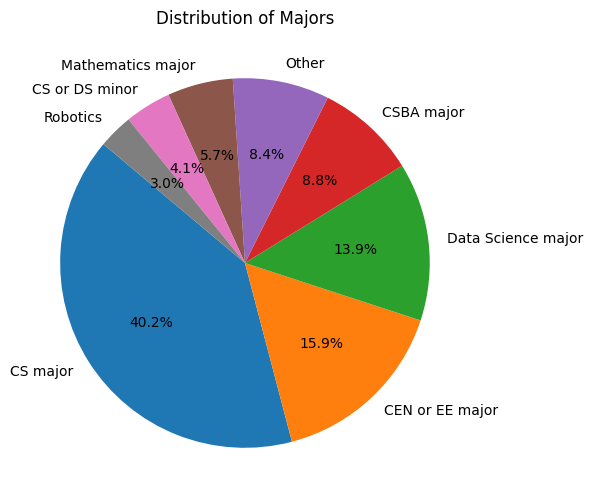

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data_df = pd.read_csv("DATA - Sheet1.csv")

valid_major = ['CS major', 'CEN or EE major', 'Data Science major', 'CSBA major', 'Mathematics major', 'CS or DS minor', "Robotics"]

other_majors = []

def categorize_major(major):
    if major in valid_major:
        return major
    other_majors.append(major)
    return 'Other'

data_df['Major'] = data_df['Major'].apply(categorize_major)

print(other_majors)

categories = data_df['Major'].value_counts()

plt.figure(figsize=(8,6))

plt.pie(categories, labels=categories.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Majors')
plt.show()

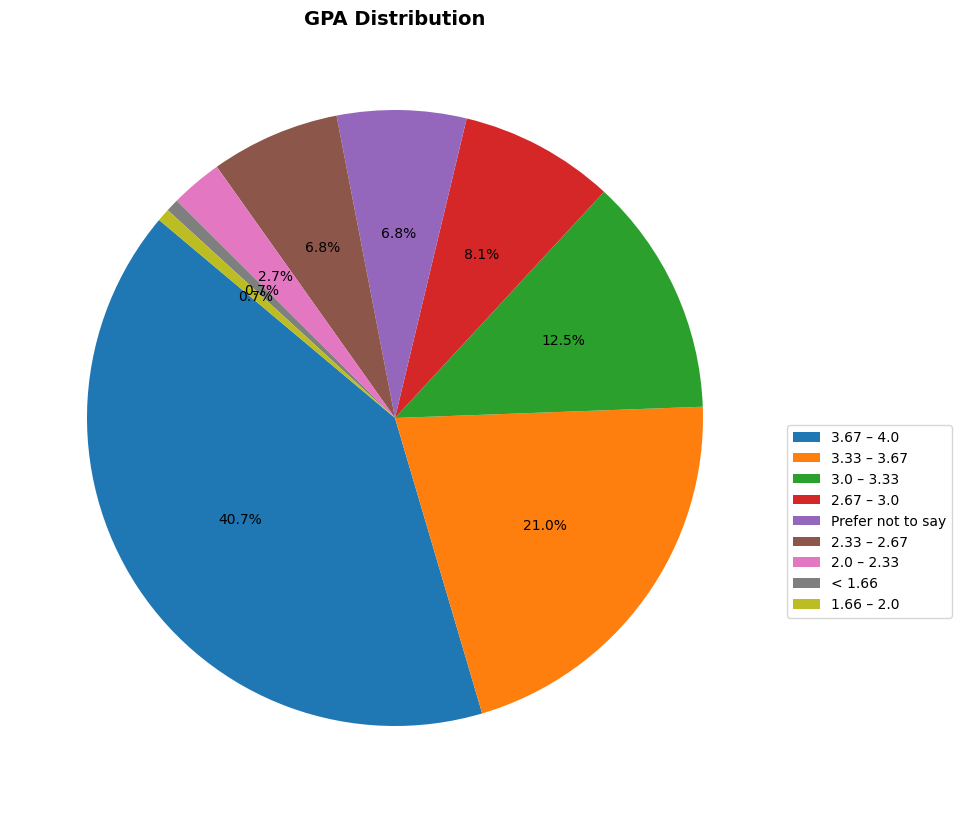

In [ ]:
gf = df['GPA'].value_counts()
labels = ("",'' ,'' ,'','','', '', '', '')
# Create the pie chart
plt.figure(figsize=(10,10))
plt.pie(
    gf, labels=labels, autopct='%1.1f%%', startangle=140)


plt.title("GPA Distribution", fontsize=14, fontweight="bold")
plt.legend(gf.index, loc="upper left", bbox_to_anchor=(1, 0.5))
plt.show()


Looking at the pie charts, we can see that the majority of students are STEM majors, specifically CS/DS related. Due to the academic rigor that the majors require, this may be why students have an overall higher GPA. The classes that this survey was taken in (CS 105, CS 111, CS 10C) are also classes that require high performance in prerequisite classes which can also explain the overall higher GPAs. Looking at this, we can determine that there is sampling bias present because we are only looking at students who are taking CS-related courses or come from a STEM background. This is not representative of the entire UCR student population which means that our study is looking at a more specific demographic.


##Stacked Bar Chart: Relationship Between GPA and Time Spent Cooking
Although the GPA is skewed, we wanted to see if there was a direct relationship between the amount of time spent cooking and the resulting GPA. By creating a stacked bar chart, we can clearly see the split between time spent on cooking with the different GPA ranges.


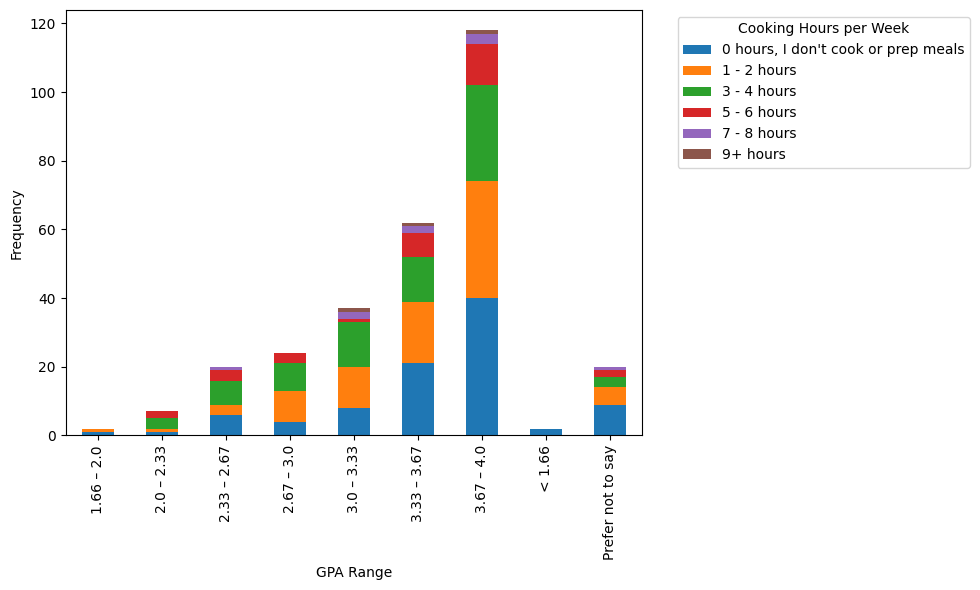

In [ ]:
data_df = pd.read_csv("datamanipulated.csv")

gpa_counts = data_df.groupby(['GPA', 'Cooking Hours per Week']).size().unstack(fill_value=0)

# Plot stacked bar chart
gpa_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Labels and title
plt.xlabel("GPA Range")
plt.ylabel("Frequency")
#plt.title("Frequency of GPA Ranges and Reasons for Not Going to Class")
plt.legend(title="Cooking Hours per Week", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

The visualization above is a stacked bar graph looking at the frequency of the GPA range, colored by the time spent cooking. Again, we see a spike for the GPA range 3.67 - 4.0, which shows that our dataset is skewed for results with a higher GPA. We also see that the people with >1.66 gpa do not cook meals, while for the other ranges there is a mix.


##Line Chart: Relationship between Not Cooking and Learning Style
For this visualization, I wanted to compare the reason that a student may not cook to the average learning effectiveness. I felt like a line graph would make it easy to compare how different reasons impact multiple learning methods, three different types. This will allow us to see patterns between the study levels. If students have “Too much homework” as a reason they may tend to have lower self-study effectiveness. Some students study differently and by plotting multiple learning methods, we can assess whether not cooking affects a particular learning style. If a particular reason correlates with a lower effectiveness in self-study or group learning, it may show that time management challenges are affecting both meal preparation and study habits.


**Data Cleaning**: I cleaned the “Reason Not To Cook” data by picking the top four most common reasons as to why people don’t cook. Raw survey data often contains too many unique responses, especially when students describe reasons in their own words.


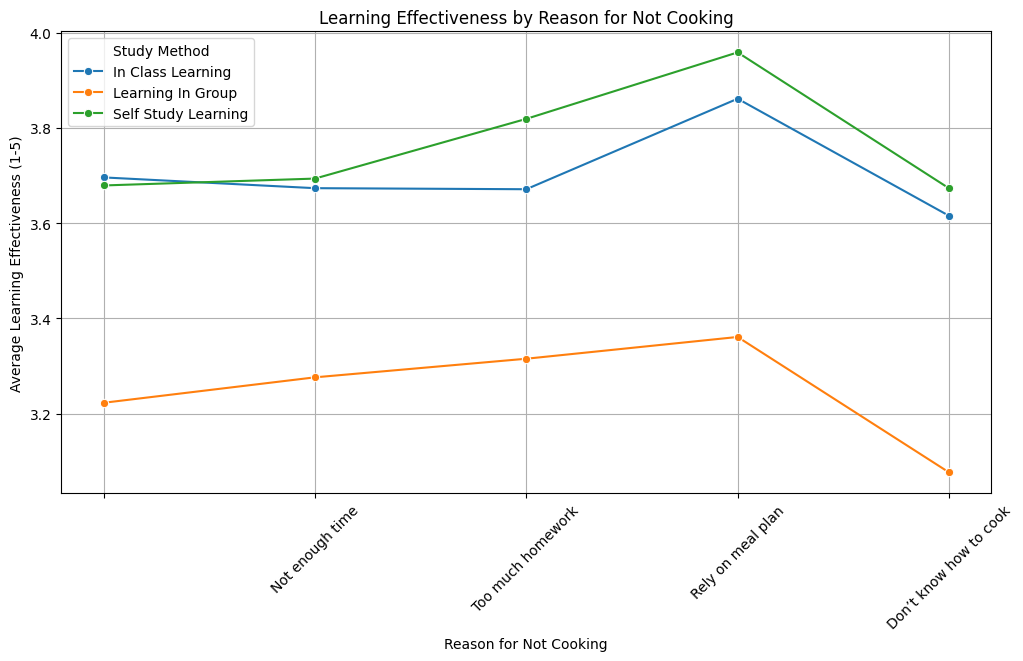

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("DATA - Sheet1.csv")

#data cleaning
df["Not Cooking Reason(s)"] = df["Not Cooking Reason(s)"].fillna("None")

# unique reasons
unique_reasons = set()
for reasons in df["Not Cooking Reason(s)"]:
    split_reasons = [r.strip() for r in reasons.split(",")]
    unique_reasons.update(split_reasons)

for reason in unique_reasons:
    df[reason] = df["Not Cooking Reason(s)"].apply(lambda x: 1 if reason in x else 0)

study_methods = ["In Class Learning", "Learning In Group", "Self Study Learning"]

study_mapping = {
    "1 (not at all)": 1,
    "2": 2,
    "3": 3,
    "4": 4,
    "5 (very effectively)": 5
}

for method in study_methods:
    df[method] = df[method].map(study_mapping)

df = df.dropna(subset=study_methods)

reason_counts = df[list(unique_reasons)].sum().sort_values(ascending=False)

top_reasons = reason_counts.head(5).index

plt.figure(figsize=(12, 6))

for method in study_methods:
    avg_learning_effectiveness = [df[df[reason] == 1][method].mean() for reason in top_reasons]
    sns.lineplot(x=top_reasons, y=avg_learning_effectiveness, marker="o", label=method)

plt.xticks(rotation=45)
plt.xlabel("Reason for Not Cooking")
plt.ylabel("Average Learning Effectiveness (1-5)")
plt.title("Learning Effectiveness by Reason for Not Cooking")
plt.legend(title="Study Method")
plt.grid(True)
plt.show()

After looking at this graph, we can see that students who rely on a meal plan tend to perform best in all study methods. In addition not knowing how to cook does negatively impact the group learning the most. In general, Not knowing how to cook had the least average learning effectiveness.


##Bar Chart: Relationship Between GPA and Eating Out
To examine if high-achieving students will eat out less, we created a bar graph looking at the relationship between GPA and the amount of times students eat out. By looking at the graph, we can see that there appears to be some weak relationship between the amount of time students eat out with their cumulative GPA range.


In [ ]:
gpa_grouped = df.groupby('GPA', observed=True)['Eat_Out_Num'].mean()

gpa_grouped.plot.bar(ylabel = 'Amount of Times Eating Out', title = "GPA vs Eating Out")

KeyError: 'Column not found: Eat_Out_Num'

Students who chose ‘Prefer not to say’ and ‘2.0 - 2.33’ ate out more compared to the other categories. This visualization does not take into consideration the distribution of students in each category. To address this, we further broke down the GPA bins, splitting each one into the different options that each student could select. By looking at the figure below, we can see that the data is skewed – the majority of students reported their GPA to be within the 3.0-4.0 range. This minimizes the relationship that we may have found looking at figure 1. Most students reporting in the 3.0 - 4.0 range will pose a problem for the question that we are asking, because for our metrics, 3.0 - 4.0 students are ‘high-achieving’. We are able to see that the distribution of students is skewed for a higher GPA, so our above graph would not be a fair interpretation of the relationship between GPA and eating out.


##Grouped Bar Chart: Number of Students Eating Out Per Week (Sorted by GPA)
After looking at the bar graph above, I became curious if results were a good representation of the population, as the bar graph above is not weighted for the number of people per category.  I split each GPA range by the counts of people who eat out per week.


In [ ]:
eat_outgpa = df['Eat_Out_Num'].groupby(df['GPA']).value_counts().unstack()
ax = eat_outgpa.plot.bar(ylabel = '# of People', figsize = (10,6),
                         title = "# Of Students Eating out Per Week (sorted by GPA)")

mylabels = ["0", "1-2", "3-4", "5-6", "7-8", "9+"]
ax.legend(title = "Eating Out per Week", labels=mylabels)

print(ax)


KeyError: 'Eat_Out_Num'

We then saw a significant spike in the GPA range 3.67-4.0. A number of things may have happened to skew the distribution. People with lower GPAs may not be comfortable with sharing what their GPA was, the rigor of the prerequisites may have hindered people with a low GPA from taking this class and survey, or due to the sampling nature of the survey (convenience sampling) the results may have been skewed.


#Hypotheses and Tests

##Hypothesis 1: We anticipate that high-achieving students (measured by GPA and amount of units taken) will cook more and eat out less.
Referring to the stacked bar chart, the  split between hours per week looks consistent across the distributions, indicating that there may not be a relationship between GPA and time spent cooking.
To determine if there was a relationship between the variables, we chose to do a Pearson’s Correlation Coefficient Test. Both variables are numeric data, and this test will show strength and direction of a linear relationship between the two variables. 0-1 indicates a positive correlation, while 0 to -1 indicates a negative correlation. The closer to zero that the correlation coefficient is, the weaker the relationship between the variables will be.


In [ ]:
pearson_corr = df['GPA_Num'].corr(df['Eat_Out_Num'])
print("Correlation Coefficient:", pearson_corr)

To confirm that there is no relationship between GPA and eating out, we computed the correlation coefficient. We found that the coefficient was -0.037, which indicates a very weak negative correlation between GPA and eating out. This aligns with the visualizations that we have created.


In [ ]:
data_dfTwo = pd.read_csv("datamanipulated.csv")
pearson_corr = data_dfTwo['GPA_Num'].corr(data_dfTwo['Cooking_Hours_Num'], method = 'pearson')
# Print the coefficient
print("Pearson's Correlation Coefficient:", pearson_corr)

The correlation coefficient found between GPA and time spent cooking is -0.05, which indicates that there is little to no correlation between these two variables.


##Hypothesis 2: Students who eat out more will tend to take lower units.
The associated visualization for this hypothesis is the scatterplot comparing units taken with the amount of times students eat out per week. We chose to do a Pearson’s Correlation Coefficient to show strength and direction of a linear relationship between the two variables, the students that eat out and how many units a student chooses to take. -1 would show a perfect negative correlation to +1, a perfect positive correlation. ) would show no linear relationship between the two variables. Because we are looking for correlation, this test would be a good indicator of that.


In [ ]:
data_dfTwo = pd.read_csv("datamanipulated.csv")
pearson_corr = data_dfTwo['Units'].corr(data_dfTwo['Eat_Out_Num'], method = 'pearson')
# Print the coefficient
print("Pearson's Correlation Coefficient:", pearson_corr)

We calculated the correlation coefficient for eating out the amount of units taken. The coefficient is 0.0049, which is very close to 0. This indicates that there is no correlation between units taken and the amount of times a student eats out per week. This further supports our analysis of the visualization– that there is no relationship between the two variables.


##Hypothesis 3: Students who don't cook due to too much homework and other factors will have lower self-study effectiveness.
We chose to use a chi-squared test because it compared the observed data to the expected to depict if a difference is statistically significant from each other. I wanted to see if there was any sort of relationship between the “Reason Not to Cook” and “Effectiveness of the Different Types of Learning”


In [ ]:
contingency_table = pd.crosstab(df["Not Cooking Reason(s)"], df["Self Study Learning"])

chi_stat, p_value, dof, expected = chi2_contingency(contingency_table)

critical_value = chi2.ppf(0.95, dof)

# Print results
print("Calculated chi-square value:", chi_stat)
print("Calculated p-value:", p_value)
print("Chi-square critical value at 0.05 significance level:", critical_value)

In this case, the Chi-Square value (430.71) is larger than the critical value (405.24), meaning there is a statistically significant relationship between the top four reasons for not cooking and self-study learning effectiveness. The p-value (0.0061) is below 0.05, confirming that this result is unlikely due to chance, however looking at the other graphs and tests








Conclusions
Our data is primarily representative of STEM (specifically CS/DS) students. The aim of our study was to investigate the relationship between academic performance and food preparation. We conducted different tests and made different visualizations to examine this potential relationship.

Our analysis aimed to explore the relationship between academic performance and food preparation. Our three hypotheses were that high-achieving students would cook more and eat out less, students who eat out will tend to take lower units, and students who don’t cook due to ‘too much homework’ and other factors will have lower self-study effectiveness.

Our findings did not suggest a significant link for our hypotheses. There was no observable relationship between students with a GPA ranging between 3.0-4.0 and the amount that they ate out and cooked. We tested this hypothesis by looking at different visualizations like bar graphs and pie charts, as well as conducting a test for Pearson’s correlation coefficient. We found that the dataset was skewed towards higher GPAs, with GPAs in the 3.0 - 4.0 range being the majority.

When examining hypothesis #2 (students who eat out will tend to take lower units), there was no observable relationship between the two variables. We created a scatterplot as a visualization to look at the relationship, and we conducted a test of Pearson’s correlation coefficient because the data was numerical.

Hypothesis #3: In this case, the Chi-Square value (430.71) is larger than the critical value (405.24), meaning there is a statistically significant relationship between the top four reasons for not cooking and self-study learning effectiveness. The p-value (0.0061) is below 0.05, confirming that this result is unlikely due to chance, suggesting that different reasons for not cooking impact self-study learning effectiveness in a meaningful way. Based on the tests conducted, I am accepted this hypothesis as true.



#Contributions
**Ali**: I was responsible for the data preprocessing section, ensuring the dataset was clean and well-structured for analysis. My work led to the generation of heat maps and their interpretation, identifying key patterns and relationships within the data. Additionally, I analyzed the Scatterplot: Learning Group vs. Cooking Hours, providing insights into the relationship between these variables through detailed analysis and interpretation.

**Ritvi**: I worked on building the visualizations, cleaning the data, analyzing our findings, and testing our hypothesis. I cleaned the dataset by handling missing values, removing values that were inconsistent. Raw data often has two many unique responses so I picked the top four to show the most popular.  I used python to code my visualizations and the p-values and chi squared test. I used my findings from the tests to determine if there was any correlation between the two given variables. Finally, I compiled the findings.

**Trusha**: I worked on gathering the initial questions for our dataset. I also worked on generating several visualizations of the dataset, and analyzing the results of these visualizations. I then explained the reasoning and the justification of the visualizations I organized categories to make them easier to handle and utilized. I computed Pearson correlations and explained the justifications of the hypotheses. I also answered the conclusion questions.

**Yana**: I answered the initial questions about what data we were planning on using and what we were trying to find with that data. I created several visualizations using the dataset and Python and organized different categories so that they were easier to work with. After creating the visualizations, I also analyzed the findings to see what could be observed from them and how they could connect to our overall question. I computed the Pearson correlations to go with the hypotheses and worked on writing the explanations of those findings.
